## Import packages

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os

import sklearn
from torch import nn
from scipy import signal

In [ ]:
from evaluations.kaggle_2020 import row_wise_micro_averaged_f1_score

In [ ]:
! pip install evaluations


[notice] A new release of pip available: 22.2 -> 23.1.2
[notice] To update, run: pip install --upgrade pip


In [ ]:
# ! pip install librosa


In [ ]:
import librosa, librosa.display
import wave
import matplotlib.pyplot as plt
import IPython.display as ipd
from pydub import AudioSegment

/home/sdosov/py_venvs/td_bert/lib/python3.8/site-packages/pydub/utils.py:170: RuntimeWarning: Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work
  warn("Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work", RuntimeWarning)


In [ ]:
# Deep Learning framework
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.optim import lr_scheduler
from torch.utils.data import Dataset, DataLoader

# Audio processing
import torchaudio
import torchaudio.transforms as T
import librosa
import timm

import noisereduce

# Pre-trained image models
# import timm

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
import torch
import torch.nn as nn

import torchvision
import torchvision.transforms as transforms

from tqdm.notebook import tqdm

import matplotlib.pyplot as plt
from IPython.display import clear_output

from math import ceil, sqrt

import numpy as np
import random

import librosa
from librosa.feature import melspectrogram
import warnings
from sklearn.utils import shuffle
from sklearn.utils import class_weight
from PIL import Image
from uuid import uuid4
from skimage import io, transform
# import matplotlib.pyplot

In [ ]:
# ! pip install scikit-image

In [ ]:
# Section of setting seeds for reproducible results of training CNNs

# Set the seed for the Python random module
# random.seed(0)

# Set the seed for NumPy's random number generator
np.random.seed(1)

# Set the seed for PyTorch's random number generator
torch.manual_seed(2)

# If training on GPU, set the seed for the GPU backend and CUDA library
if torch.cuda.is_available():
    torch.cuda.manual_seed_all(3)

g = torch.Generator()
g.manual_seed(4)

num_workers = 2 #4     # maximum number of subprocces (check https://pytorch.org/docs/stable/data.html for more info)
batch_size = 8 #1024


device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print('Using {} device'.format(device))

Using cuda:0 device


## Open data

In [ ]:
# import zipfile
# archive = '/home/sdosov/birds/birdsong-recognition.zip'
# with zipfile.ZipFile(archive, 'r') as zip_file:
#     zip_file.extractall('/home/sdosov/birds/')

In [ ]:
# ! cp /content/drive/MyDrive/birds/train_preprocess.csv /content/


In [ ]:
train_data = pd.read_csv("/home/sdosov/birds/train.csv")
train_data.head()

,rating,playback_used,ebird_code,channels,date,pitch,duration,filename,speed,species,...,xc_id,url,country,author,primary_label,longitude,length,time,recordist,license
0,3.5,no,aldfly,1 (mono),2013-05-25,Not specified,25,XC134874.mp3,Not specified,Alder Flycatcher,...,134874,https://www.xeno-canto.org/134874,United States,Jonathon Jongsma,Empidonax alnorum_Alder Flycatcher,-92.962,Not specified,8:00,Jonathon Jongsma,Creative Commons Attribution-ShareAlike 3.0
1,4.0,no,aldfly,2 (stereo),2013-05-27,both,36,XC135454.mp3,both,Alder Flycatcher,...,135454,https://www.xeno-canto.org/135454,United States,Mike Nelson,Empidonax alnorum_Alder Flycatcher,-82.1106,0-3(s),08:30,Mike Nelson,Creative Commons Attribution-NonCommercial-Sha...
2,4.0,no,aldfly,2 (stereo),2013-05-27,both,39,XC135455.mp3,both,Alder Flycatcher,...,135455,https://www.xeno-canto.org/135455,United States,Mike Nelson,Empidonax alnorum_Alder Flycatcher,-82.1106,0-3(s),08:30,Mike Nelson,Creative Commons Attribution-NonCommercial-Sha...
3,3.5,no,aldfly,2 (stereo),2013-05-27,both,33,XC135456.mp3,both,Alder Flycatcher,...,135456,https://www.xeno-canto.org/135456,United States,Mike Nelson,Empidonax alnorum_Alder Flycatcher,-82.1106,0-3(s),08:30,Mike Nelson,Creative Commons Attribution-NonCommercial-Sha...
4,4.0,no,aldfly,2 (stereo),2013-05-27,both,36,XC135457.mp3,level,Alder Flycatcher,...,135457,https://www.xeno-canto.org/135457,United States,Mike Nelson,Empidonax alnorum_Alder Flycatcher,-82.1106,0-3(s),08:30,Mike Nelson,Creative Commons Attribution-NonCommercial-Sha...


In [ ]:
print([x for x in train_data.ebird_code.value_counts()])

[100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 99, 98, 98, 97, 97, 96, 96, 95, 95, 94, 94, 94, 93, 93, 93, 92, 91, 91, 90, 90, 90, 90, 89, 89, 89, 87, 87, 86, 85, 85, 83, 83, 82, 82, 82, 81, 79, 78, 77, 76, 76, 76, 75, 75, 75, 74, 74, 74, 74, 74, 73, 72, 70, 70, 70, 69, 69, 69, 68, 67, 66, 66, 66, 66, 66, 65, 65, 64, 64, 63, 60, 60, 60, 60, 59, 57, 57, 57, 57, 55, 55, 53, 5

In [ ]:
base_dir = "../birdsong-recognition/"
train_data['full_path'] = base_dir + train_data['ebird_code'] + '/' + train_data['filename']

In [ ]:
birds_views = train_data.ebird_code.unique() #['aldfly', 'ameavo', 'bktspa', 'brdowl']

In [ ]:
len(train_data.ebird_code.unique())

264

In [ ]:
print(train_data.ebird_code.unique())

['aldfly' 'ameavo' 'amebit' 'amecro' 'amegfi' 'amekes' 'amepip' 'amered'
 'amerob' 'amewig' 'amewoo' 'amtspa' 'annhum' 'astfly' 'baisan' 'baleag'
 'balori' 'banswa' 'barswa' 'bawwar' 'belkin1' 'belspa2' 'bewwre' 'bkbcuc'
 'bkbmag1' 'bkbwar' 'bkcchi' 'bkchum' 'bkhgro' 'bkpwar' 'bktspa' 'blkpho'
 'blugrb1' 'blujay' 'bnhcow' 'boboli' 'bongul' 'brdowl' 'brebla' 'brespa'
 'brncre' 'brnthr' 'brthum' 'brwhaw' 'btbwar' 'btnwar' 'btywar' 'buffle'
 'buggna' 'buhvir' 'bulori' 'bushti' 'buwtea' 'buwwar' 'cacwre' 'calgul'
 'calqua' 'camwar' 'cangoo' 'canwar' 'canwre' 'carwre' 'casfin' 'caster1'
 'casvir' 'cedwax' 'chispa' 'chiswi' 'chswar' 'chukar' 'clanut' 'cliswa'
 'comgol' 'comgra' 'comloo' 'commer' 'comnig' 'comrav' 'comred' 'comter'
 'comyel' 'coohaw' 'coshum' 'cowscj1' 'daejun' 'doccor' 'dowwoo' 'dusfly'
 'eargre' 'easblu' 'easkin' 'easmea' 'easpho' 'eastow' 'eawpew' 'eucdov'
 'eursta' 'evegro' 'fiespa' 'fiscro' 'foxspa' 'gadwal' 'gcrfin' 'gnttow'
 'gnwtea' 'gockin' 'gocspa' 'goleag' 'grbher3

In [ ]:
train_df = train_data.loc[train_data['ebird_code'].isin(birds_views)]
len(train_df)

21375

In [ ]:
train_df = train_df.query("rating>=4")
len(train_df)

# birds_count = {}
# for bird_species, count in zip(train_df.ebird_code.unique(), train_df.groupby("ebird_code")["ebird_code"].count().values):
#     birds_count[bird_species] = count
# most_represented_birds = [key for key,value in birds_count.items() if value == 100]

# train_df = train_df.query("ebird_code in @most_represented_birds")

15470

In [ ]:
train_df = shuffle(train_df)
train_df.head()

,rating,playback_used,ebird_code,channels,date,pitch,duration,filename,speed,species,...,url,country,author,primary_label,longitude,length,time,recordist,license,full_path
5945,4.0,no,cliswa,1 (mono),2015-05-24,Not specified,5,XC304783.mp3,Not specified,American Cliff Swallow,...,https://www.xeno-canto.org/304783,United States,Paul Marvin,Petrochelidon pyrrhonota_Cliff Swallow,-98.6727,Not specified,15:02,Paul Marvin,Creative Commons Attribution-NonCommercial-Sha...,../birdsong-recognition/cliswa/XC304783.mp3
8985,5.0,no,goleag,2 (stereo),2018-07-08,Not specified,67,XC449076.mp3,Not specified,Golden Eagle,...,https://www.xeno-canto.org/449076,Sweden,Patrik Åberg,Aquila chrysaetos_Golden Eagle,18.4861,Not specified,06:08,Patrik Åberg,Creative Commons Attribution-NonCommercial-Sha...,../birdsong-recognition/goleag/XC449076.mp3
18139,5.0,no,sposan,1 (mono),2016-09-03,Not specified,13,XC334369.mp3,Not specified,Spotted Sandpiper,...,https://www.xeno-canto.org/334369,United States,Paul Marvin,Actitis macularius_Spotted Sandpiper,-80.7717,Not specified,12:01,Paul Marvin,Creative Commons Attribution-NonCommercial-Sha...,../birdsong-recognition/sposan/XC334369.mp3
5699,5.0,no,chiswi,1 (mono),2016-05-13,Not specified,33,XC316342.mp3,Not specified,Chimney Swift,...,https://www.xeno-canto.org/316342,United States,J.R. Rigby,Chaetura pelagica_Chimney Swift,-89.5301,Not specified,17:00,J.R. Rigby,Creative Commons Attribution-NonCommercial-Sha...,../birdsong-recognition/chiswi/XC316342.mp3
15228,4.0,no,plsvir,2 (stereo),2016-05-10,Not specified,96,XC318952.mp3,Not specified,Plumbeous Vireo,...,https://www.xeno-canto.org/318952,Belize,Jacob R. Saucier,Vireo plumbeus_Plumbeous Vireo,-88.9496,Not specified,11:00,Jacob R. Saucier,Creative Commons Attribution-NonCommercial-Sha...,../birdsong-recognition/plsvir/XC318952.mp3


In [ ]:
PATH = "/home/sdosov/birds/train_audio/aldfly/XC134874.mp3"

# Load a sample audio file with torchaudio
original_audio, sample_rate = torchaudio.load(PATH)

# Load a sample audio file with librosa
original_audio, sample_rate = librosa.load(PATH, sr = None) #

In [ ]:
# Play the audio in Jupyter notebook
from IPython.display import Audio

Audio(data = original_audio, rate = sample_rate)

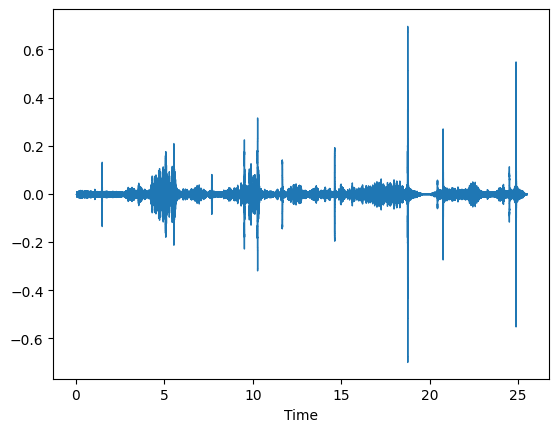

AttributeError: module 'matplotlib' has no attribute 'pyplot'

In [ ]:
# y, sr = librosa.load(librosa.ex('choice'), duration=10)
# fig, ax = pyplot.subplots(nrows=3, sharex=True)
# librosa.display.waveshow(y, sr=sr, ax=ax[0])
# ax[0].label_outer()
import librosa.display as dsp
dsp.waveshow(original_audio, sr = sample_rate)

In [ ]:
audio_path = '/home/sdosov/birds/train_audio/aldfly/XC2628.mp3'
wave_data, wave_rate = librosa.load(audio_path, sr=32000)
reduced_noise =noisereduce.reduce_noise(y=wave_data, sr=wave_rate)
wave_data, _ = librosa.effects.trim(wave_data)


## Dataset

In [ ]:
def f_high(y,sr):
    b,a = signal.butter(10, 2000/(sr/2), btype='highpass')
    yf = signal.lfilter(b,a,y)
    return yf

In [ ]:
def get_sample(filename, bird, output_folder):
    SR = 16000
    # rate, data = wavfile.read("mywav.wav")
    # # perform noise reduction
    # reduced_noise = nr.reduce_noise(y=data, sr=rate)
    # wavfile.write("mywav_reduced_noise.wav", rate, reduced_noise)
    try:
    
        wave_data, wave_rate = librosa.load(filename, sr=SR)
        # wave_data = f_high(wave_data, wave_rate)
        reduced_noise =noisereduce.reduce_noise(y=wave_data, sr=wave_rate)
        wave_data, _ = librosa.effects.trim(wave_data)
        #only take 5s samples and add them to the dataframe
        song_sample = []
        sample_length = 5*wave_rate
        samples_from_file = []
        #The variable below is chosen mainly to create a 216x216 image
        N_mels=216
        for idx in range(0,len(wave_data),sample_length): 
            song_sample = wave_data[idx:idx+sample_length]
            if len(song_sample)>=sample_length:
                mel = librosa.feature.melspectrogram(y=song_sample, n_mels=N_mels)
                db = librosa.power_to_db(mel)
                normalised_db = sklearn.preprocessing.minmax_scale(db)
                filename = str(uuid4())+".tif"
                db_array = (np.asarray(normalised_db)*255).astype(np.uint8)
                db_image =  Image.fromarray(np.array([db_array, db_array, db_array]).T)
                db_image.save("{}{}".format(output_folder,filename))
                
                samples_from_file.append({"song_sample":"{}{}".format(output_folder,filename),
                                                "bird":bird})
    except:
        pass
    return samples_from_file


In [ ]:
# samples_df = pd.DataFrame(columns=["song_sample","bird"])

# #We limit the number of audio files being sampled to 1000 in this notebook to save time
# #on top of having limited the number of bird species previously
# sample_limit = 1000
# sample_list = []

# output_folder = "/home/sdosov/birds/melspectrogram_dataset_noisereduce/"
# os.mkdir(output_folder)
# # with tqdm(total=sample_limit) as pbar:
# for idx, row in tqdm(train_df.iterrows()):
#     # pbar.update(1)
#     try:
#         audio_file_path = "/home/sdosov/birds/train_audio/"
#         audio_file_path += row.ebird_code
        
#         sample_list += get_sample('{}/{}'.format(audio_file_path, row.filename), row.ebird_code, output_folder)
#     except:
#         raise
#         print("{} is corrupted".format(audio_file_path))
        
#     samples_df = pd.DataFrame(sample_list)
#     samples_df.to_csv('/home/sdosov/birds/samples_noise.csv')


# samples_df = pd.DataFrame(sample_list)

In [ ]:
# ! pip install --upgrade jupyter
# ! pip install --upgrade ipywidgets

In [ ]:
# samples_df = pd.DataFrame(sample_list)
samples_df = pd.read_csv("/home/sdosov/birds/samples.csv")

In [ ]:
# samples_df.to_csv('/home/sdosov/birds/samples_noisereduce.csv')

In [ ]:
samples_df.iloc[10].song_sample

'/home/sdosov/birds/melspectrogram_dataset/8e20c364-7b07-4667-8082-c959db3a4365.tif'

In [ ]:
demo_img = Image.open(samples_df.iloc[20].song_sample)
demo_img.size

(216, 216)

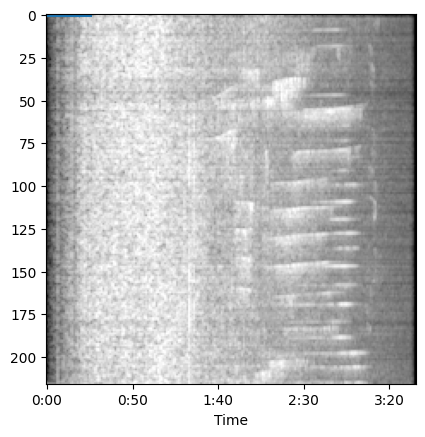

AttributeError: module 'matplotlib' has no attribute 'pyplot'

In [ ]:
# demo_img.show()
import matplotlib.pyplot as plt
# im = Image.open('image.jpg')
plt.imshow(demo_img)
plt.show()

In [ ]:
samples_df.head()

,Unnamed: 0,song_sample,bird
0,0,/home/sdosov/birds/melspectrogram_dataset/6ff7...,goleag
1,1,/home/sdosov/birds/melspectrogram_dataset/7a8c...,goleag
2,2,/home/sdosov/birds/melspectrogram_dataset/dcfb...,goleag
3,3,/home/sdosov/birds/melspectrogram_dataset/ef3e...,goleag
4,4,/home/sdosov/birds/melspectrogram_dataset/b055...,goleag


In [ ]:
training_percentage = 0.9
from sklearn.model_selection import train_test_split

training_df, validation_df = train_test_split(samples_df, test_size=0.2, random_state=31232)

# training_item_count = int(len(samples_df)*training_percentage)
# validation_item_count = len(samples_df)-int(len(samples_df)*training_percentage)
# training_df = samples_df[:training_item_count]
# validation_df = samples_df[training_item_count:]

In [ ]:
BIRD_CODE = {
    'aldfly': 0, 'ameavo': 1, 'bktspa': 2, 'brdowl': 3
    # 'aldfly': 0, 'ameavo': 1, 'amebit': 2, 'amecro': 3, 'amegfi': 4,
    # 'amekes': 5, 'amepip': 6, 'amered': 7, 'amerob': 8, 'amewig': 9 
}

In [ ]:
birds_views = samples_df.bird.unique()
BIRD_CODE = {}
for i, x in enumerate(birds_views):
    BIRD_CODE[x] = i
BIRD_CODE


{'goleag': 0,
 'sposan': 1,
 'chiswi': 2,
 'plsvir': 3,
 'houwre': 4,
 'purfin': 5,
 'belkin1': 6,
 'rocpig': 7,
 'westan': 8,
 'bewwre': 9,
 'wilfly': 10,
 'casvir': 11,
 'houspa': 12,
 'merlin': 13,
 'buggna': 14,
 'fiscro': 15,
 'olsfly': 16,
 'grycat': 17,
 'eucdov': 18,
 'rebnut': 19,
 'brdowl': 20,
 'rocwre': 21,
 'amtspa': 22,
 'rusbla': 23,
 'astfly': 24,
 'warvir': 25,
 'canwre': 26,
 'comred': 27,
 'horlar': 28,
 'comrav': 29,
 'bkbmag1': 30,
 'robgro': 31,
 'brebla': 32,
 'bktspa': 33,
 'orcwar': 34,
 'amerob': 35,
 'reevir1': 36,
 'eawpew': 37,
 'cangoo': 38,
 'mouchi': 39,
 'canwar': 40,
 'hergul': 41,
 'lazbun': 42,
 'tuftit': 43,
 'barswa': 44,
 'wewpew': 45,
 'spotow': 46,
 'norpar': 47,
 'redcro': 48,
 'whcspa': 49,
 'wooscj2': 50,
 'yehbla': 51,
 'savspa': 52,
 'bkcchi': 53,
 'amecro': 54,
 'osprey': 55,
 'yerwar': 56,
 'comter': 57,
 'bkhgro': 58,
 'amered': 59,
 'brthum': 60,
 'rewbla': 61,
 'linspa': 62,
 'herthr': 63,
 'grcfly': 64,
 'leasan': 65,
 'sonspa': 66,
 

## Create dataset

In [ ]:
# img_transforms = transforms.Compose([transforms.Resize(255),
#                                      transforms.CenterCrop(224),
#                                     #  transforms.RandomHorizontalFlip(),
#                                     #  transforms.RandomRotation(20),
#                                      transforms.ToTensor(),
#                                      transforms.Normalize(mean=[0.485, 0.456, 0.406],
#                                                           std=[0.229, 0.224, 0.225])])
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(
        mean=[0.485, 0.456, 0.406],
        std=[0.229, 0.224, 0.225]
    )
])

# img_transforms_valid = transforms.Compose([transforms.Resize(255),
#                                            transforms.CenterCrop(224),
#                                            transforms.ToTensor(),
#                                            transforms.Normalize(mean=[0.485, 0.456, 0.406],
#                                                                 std=[0.229, 0.224, 0.225])])

In [ ]:
class AudioDataset(Dataset):
    def __init__(self, 
                 df,
                 transform=None):
        self.df = df
        self.file_paths = df['song_sample'].values
        self.transform = transform
        # self.labels = df['ebird_code_id'].values

        # onehotencoder = OneHotEncoder()
        # data_new = onehotencoder.fit_transform(df['ebird_code'].values.reshape(-1,1))
        # self.labels = pd.DataFrame(data_new.toarray(), columns=onehotencoder.categories_).values
        # self.target_sample_rate = target_sample_rate
        # self.num_samples = target_sample_rate * audio_length
        # self.wave_transforms = wave_transforms
        # self.spec_transforms = spec_transforms
        
    def __len__(self):
        return len(self.df)
    
    def __getitem__(self, index):

        # # Load audio from file to waveform
        # audio, sample_rate = torchaudio.load(self.file_paths[index])

        # # Convert to mono
        # audio = torch.mean(audio, axis=0)

        # # Resample
        # if sample_rate != self.target_sample_rate:
        #     resample = T.Resample(sample_rate, self.target_sample_rate)
        #     audio = resample(audio)
        
        # # Adjust number of samples
        # if audio.shape[0] > self.num_samples:
        #     # Crop
        #     audio = audio[:self.num_samples]
        # elif audio.shape[0] < self.num_samples:
        #     # Pad
        #     audio = F.pad(audio, (0, self.num_samples - audio.shape[0]))


        # Add any preprocessing you like here 
        # (e.g., noise removal, etc.)
        ...
        
        # Add any data augmentations for waveform you like here
        # (e.g., noise injection, shifting time, changing speed and pitch)
        ...

        # Convert to Mel spectrogram
        # melspectrogram = T.MelSpectrogram(sample_rate = self.target_sample_rate, 
        #                                 n_mels = 128, 
        #                                 n_fft = 2048, 
        #                                 hop_length = 512)
        # melspec = melspectrogram(audio)
        
        # Add any data augmentations for spectrogram you like here
        # (e.g., Mixup, cutmix, time masking, frequency masking)
        ...
        
        # return {"image": torch.stack([melspec]), 
        #         "label": torch.tensor(self.labels[index]).float()}
        img_name = self.df.iloc[index].song_sample

        image = Image.open(img_name)

        img_label = BIRD_CODE[self.df.iloc[index].bird]


        if transform is not None:
            image = self.transform(image)


        return image, img_label

In [ ]:
train_data = AudioDataset(training_df, transform)
val_data = AudioDataset(validation_df, transform)


In [ ]:
train_dataloader = torch.utils.data.DataLoader(
    train_data, shuffle=True, 
    batch_size=32, num_workers=8,
)


test_dataloader = torch.utils.data.DataLoader(
    val_data, shuffle=False, 
    batch_size=32
)

## Create model

In [ ]:
class AudioModel(nn.Module):
    def __init__(self, 
                model_name = 'resnet18', # 'tf_efficientnet_b3_ns'
                pretrained = True, 
                num_classes = 264):
        super(AudioModel, self).__init__()
        # if model_name == 'regnetx_002':
        #     self.model = timm.create_model('regnetx_002', pretrained=True)
        # else:
        self.model = torchvision.models.__getattribute__(model_name)(pretrained=pretrained) #resnet50(pretrained=True) #torch.hub.load('pytorch/vision:v0.10.0', model_name, pretrained=True) #'NVIDIA/DeepLearningExamples:torchhub'
        # self.model = timm.create_model(model_name, 
        #                                pretrained = pretrained, 
        #                                in_chans = 3)
        # for param in self.model.parameters():
        #     param.requires_grad = False
        # timm.create_model(model_name, 
        #                                pretrained = pretrained, 
        #                                in_chans = 1)

        # x = torch.randn(1, 1, 224, 224)
        # model = models.vgg16(pretrained=False) # pretrained=False just for debug reasons
        # first_conv_layer = [nn.Conv2d(1, 3, kernel_size=3, stride=1, padding=1, dilation=1, groups=1, bias=True)]
        # first_conv_layer.extend(list(model.features))  
        # model.features= nn.Sequential(*first_conv_layer )  
        # output = model(x)
        if model_name[:6] == 'resnet':
            self.in_features = self.model.fc.in_features
        elif model_name == 'regnet_x_800mf':
            self.in_features= 672
        self.model.fc = nn.Identity()
        self.lin = nn.Linear(self.in_features, num_classes)
        # self.model.fc = nn.Sequential(
        #       nn.Linear(self.in_features, num_classes)
        #   )

    def forward(self, images):
        logits = self.model(images)
        return self.lin(logits)

## Tensorboard

In [ ]:
import torch
from torch.utils.tensorboard import SummaryWriter
writer = SummaryWriter('runs/birds_efficientnetb3')
writer.flush()

In [ ]:
writer.flush()

In [ ]:
! tensorboard --logdir=runs

TensorFlow installation not found - running with reduced feature set.
/home/sdosov/py_venvs/td_bert/lib/python3.8/site-packages/tensorboard_data_server/bin/server: /lib/x86_64-linux-gnu/libc.so.6: version `GLIBC_2.33' not found (required by /home/sdosov/py_venvs/td_bert/lib/python3.8/site-packages/tensorboard_data_server/bin/server)
/home/sdosov/py_venvs/td_bert/lib/python3.8/site-packages/tensorboard_data_server/bin/server: /lib/x86_64-linux-gnu/libc.so.6: version `GLIBC_2.34' not found (required by /home/sdosov/py_venvs/td_bert/lib/python3.8/site-packages/tensorboard_data_server/bin/server)
/home/sdosov/py_venvs/td_bert/lib/python3.8/site-packages/tensorboard_data_server/bin/server: /lib/x86_64-linux-gnu/libc.so.6: version `GLIBC_2.32' not found (required by /home/sdosov/py_venvs/td_bert/lib/python3.8/site-packages/tensorboard_data_server/bin/server)
Serving TensorBoard on localhost; to expose to the network, use a proxy or pass --bind_all
TensorBoard 2.12.1 at http://localhost:6006/

## Train/test loop

In [ ]:
from sklearn.metrics import f1_score

In [ ]:
import IPython
from math import ceil


def test_loop(model, dataloader, loss_fn, history_loss=None, history_acc=None, history_f1=None):

    size = len(dataloader.dataset)
    test_loss, correct, f1 = 0, 0, 0
    batches = ceil(size / dataloader.batch_size)

    val_loss, val_acc = [], []
    model.eval()
    with torch.no_grad():
        # evalute and check predictions
        for X, y in dataloader:
            X, y = X.to(device), y.to(device)
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()
            f1 += f1_score(y.cpu().data.numpy(), pred.argmax(1).cpu().data.numpy(), average='micro')
            # print("pred: ", pred)
            # print("pred.argmax(1): ", pred.argmax(1))
            # print("pred.argmax(1) == y: ",pred.argmax(1) == y)
            # print("(pred.argmax(1) == y).type(torch.float).sum(): ", (pred.argmax(1) == y).type(torch.float).sum())

    test_loss /= batches
    correct /= size
    f1 /= batches
    
    print(f"Validation accuracy: {(100*correct):>0.3f}%, Validation loss: {test_loss:>8f}, Validation F1: {f1:>8f} \n")

    if history_loss is not None:
        history_loss.append(test_loss)
    if history_acc is not None:
        history_acc.append(100*correct)
    if history_f1 is not None:
        history_f1.append(f1)
    
    return {'val_loss': test_loss, 'val_acc': 100*correct, 'val_f1': f1}


In [ ]:
def plot_learning_process(train_loss, train_acc, val_loss, val_acc):
    
    fig = plt.figure(figsize=(12, 4))
    
    ax1 = plt.subplot(121)
    ax1.set_title('loss by epoch')
    ax1.plot(np.arange(0, len(train_loss)) + 0.5, train_loss, label='train')
    ax1.plot(np.arange(0, len(val_loss)) + 1, val_loss, label='val')
    ax1.legend()
    ax1.grid()
    ax1.set_xlabel('epoch')
    ax1.set_ylabel('loss function')

    ax2 = plt.subplot(122)
    ax2.set_title('accuracy by epoch')
    ax2.plot(np.arange(0, len(train_acc)) + 0.5, train_acc, label='train')
    ax2.plot(np.arange(0, len(val_acc)) + 1, val_acc, label='val')
    ax2.legend()
    ax2.grid()
    ax2.set_xlabel('epoch')
    ax2.set_ylabel('accuracy')
    
    fig.tight_layout()
    plt.show()

In [ ]:
def train_loop(model, dataloader, loss_fn, optimizer, step=0.05, history_loss=None, history_acc=None, history_f1=None):
    out = display(IPython.display.Pretty('Learning...'), display_id=True)

    size = len(dataloader.dataset) 
    len_size = len(str(size))
    batches = ceil(size / dataloader.batch_size) - 1
    
    train_acc, train_loss = [], []
    percentage = 0
    acc_, loss_, f1_ = 0, 0, 0
    
    for batch, (X, y) in enumerate(tqdm(dataloader, leave=False, desc="Batch #")):
        X, y = X.to(device), y.to(device)
        model.to(device)
        correct = 0
        # evaluate
        model.train()
        optimizer.zero_grad()
        pred = model(X)
        # print("pred: ", pred)
        # print("pred.argmax(1): ", pred.argmax(1))
        # print("pred.argmax(1) == y: ",pred.argmax(1) == y)
        # print("(pred.argmax(1) == y).type(torch.float).sum(): ", (pred.argmax(1) == y).type(torch.float).sum())
        # pred:  tensor([[-0.0603,  0.3523, -0.9981,  ..., -0.0822, -0.4001,  0.3694],
        # [-0.2933,  0.1003, -0.9553,  ..., -0.0026, -0.1862,  0.5610],
        # [ 0.0912,  0.3701, -1.0746,  ..., -0.7959, -0.4046,  1.0109],
        # ...,
        # [ 0.0613,  0.4527, -0.4626,  ..., -0.4249, -0.3354,  1.0977],
        # [ 0.1554,  0.3616, -0.8502,  ...,  0.0314, -0.2780,  0.8443],
        # [ 0.6022,  0.1805, -0.6554,  ..., -0.3387, -0.3904,  1.3173]],
        # device='cuda:0', grad_fn=<AddmmBackward0>)
        # pred.argmax(1):  tensor([ 56, 232, 170, 263, 233, 164, 181, 223], device='cuda:0')
        # pred.argmax(1) == y:  tensor([False, False, False, False, False, False, False, False],
        #        device='cuda:0')
        # (pred.argmax(1) == y).type(torch.float).sum():  tensor(0., device='cuda:0')
        # print(pred)
        # print(y)
        loss = loss_fn(pred, y)#torch.tensor(pred, dtype=torch.float), torch.tensor(y, dtype=torch.float))
        # torch.tensor(t, dtype=torch.float).Yt_train = Yt_train.type(torch.LongTensor)
        
        # backpropagation
        
        loss.backward()
        optimizer.step()
        correct = (pred.argmax(1) == y).type(torch.float).sum().item()
        f1_ += f1_score(y.cpu().data.numpy(), pred.argmax(1).cpu().data.numpy(), average='micro')
        # print(correct)
        acc_ += correct #train_acc.append(correct / dataloader.batch_size)
        loss_ += loss.cpu().data.numpy()
                
        # print info
        if batch / batches > percentage or batch == batches: 
            # correct = (pred.argmax(1) == y).type(torch.float).sum().item()
            # correct /= dataloader.batch_size
            out.update(f'[{int(percentage * size)}/{size}] Loss: {loss:>8f}')
            # train_loss.append(loss.cpu().data.numpy())
            # train_acc.append(correct)
            percentage += step

    loss_ /= batches
    acc_ /= size
    f1_ /= batches
    
    if history_loss is not None:
        history_loss.append(loss_)
    if history_acc is not None:
        history_acc.append(acc_ * 100)
    if history_f1 is not None:
        history_f1.append(f1_)
      
    # print('train_loss: {}, train_acc: {}'.format(train_loss, train_acc))

    return {'train_loss': loss_, 'train_acc': acc_ * 100, 'train_f1': f1_}

In [ ]:
# ! pip install --upgrade huggingface_hub

In [ ]:
!pip install -U git+https://github.com/yisaienkov/evaluations

  Cloning https://github.com/yisaienkov/evaluations to /tmp/pip-req-build-7z4xuof7
  Running command git clone --filter=blob:none --quiet https://github.com/yisaienkov/evaluations /tmp/pip-req-build-7z4xuof7
  Resolved https://github.com/yisaienkov/evaluations to commit 1b2bfdd51df83081a69622769babc5dd5f41dadc
  Preparing metadata (setup.py) ... done

[notice] A new release of pip available: 22.2 -> 23.1.2
[notice] To update, run: pip install --upgrade pip


In [ ]:
net = AudioModel(model_name='resnet50')

Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /home/sdosov/.cache/torch/hub/checkpoints/resnet34-b627a593.pth


  0%|          | 0.00/83.3M [00:00<?, ?B/s]

In [ ]:
# import torch
# from torch.utils.tensorboard import SummaryWriter
# writer = SummaryWriter('runs/birds_')
# writer.flush()

In [ ]:
# loss_fn, optimizer and number of epochs are required
loss_fn = torch.nn.functional.cross_entropy
optimizer = torch.optim.Adam(net.parameters(), lr=1e-4)
epochs = 15
# path = '/home/sdosov/birds/checkpoints/best_checkpoints_regnet_x_800mf_noisereduce_f1.pt'

curr_loss = 1000

train_loss, train_acc, train_f1 = [], [], []

val_loss, val_acc, val_f1 = [], [], []
    
for epoch in range(epochs):
    print(f"Epoch {epoch+1}\n-------------------------------")
    train_ = train_loop(net, train_dataloader, loss_fn, optimizer, history_loss=train_loss, history_acc=train_acc, history_f1=train_f1)
    writer.add_scalar('Loss/train', train_['train_loss'], epoch)
    writer.add_scalar('Accuracy/train', train_['train_acc'], epoch)
    writer.add_scalar('Row-Wise Micro Averaged F1/train', train_['train_f1'], epoch)
    val_ = test_loop(net, test_dataloader, loss_fn, history_loss=val_loss, history_acc=val_acc, history_f1=val_f1)
    writer.add_scalar('Loss/test', val_['val_loss'], epoch)
    writer.add_scalar('Accuracy/test', val_['val_acc'], epoch)
    writer.add_scalar('Row-Wise Micro Averaged F1/test', val_['val_f1'], epoch)
    # if val_['val_loss'] < curr_loss:
    #     torch.save({
    #         'epoch': epoch,
    #         'model_state_dict': net.state_dict(),
    #         'optimizer_state_dict': optimizer.state_dict(),
    #         'loss': val_['val_loss'],
    #         }, path)
    #     curr_loss = val_['val_loss']
    # train_loss.append(train_['train_loss'])
    # train_acc.append(train_['train_acc'])
    # val_loss.append(train_['val_loss'])
    # val_acc.append(train_['val_acc'])
# <----- your code here ----->

Epoch 1
-------------------------------


'[67913/67913] Loss: 1.909475'

Batch #:   0%|          | 0/2123 [00:00<?, ?it/s]

Validation accuracy: 69.280%, Validation loss: 1.438896, Validation F1: 0.692831 

Epoch 2
-------------------------------


'[67913/67913] Loss: 1.707676'

Batch #:   0%|          | 0/2123 [00:00<?, ?it/s]

Validation accuracy: 81.336%, Validation loss: 0.829558, Validation F1: 0.813380 

Epoch 3
-------------------------------


'[67913/67913] Loss: 0.587715'

Batch #:   0%|          | 0/2123 [00:00<?, ?it/s]

Validation accuracy: 85.729%, Validation loss: 0.611419, Validation F1: 0.857323 

Epoch 4
-------------------------------


'[61121/67913] Loss: 0.124271'

Batch #:   0%|          | 0/2123 [00:00<?, ?it/s]

In [ ]:
! tensorboard --logdir=runs

TensorFlow installation not found - running with reduced feature set.
/home/sdosov/py_venvs/td_bert/lib/python3.8/site-packages/tensorboard_data_server/bin/server: /lib/x86_64-linux-gnu/libc.so.6: version `GLIBC_2.33' not found (required by /home/sdosov/py_venvs/td_bert/lib/python3.8/site-packages/tensorboard_data_server/bin/server)
/home/sdosov/py_venvs/td_bert/lib/python3.8/site-packages/tensorboard_data_server/bin/server: /lib/x86_64-linux-gnu/libc.so.6: version `GLIBC_2.34' not found (required by /home/sdosov/py_venvs/td_bert/lib/python3.8/site-packages/tensorboard_data_server/bin/server)
/home/sdosov/py_venvs/td_bert/lib/python3.8/site-packages/tensorboard_data_server/bin/server: /lib/x86_64-linux-gnu/libc.so.6: version `GLIBC_2.32' not found (required by /home/sdosov/py_venvs/td_bert/lib/python3.8/site-packages/tensorboard_data_server/bin/server)
Serving TensorBoard on localhost; to expose to the network, use a proxy or pass --bind_all
TensorBoard 2.12.1 at http://localhost:6006/

## Prediction

In [ ]:
model = AudioModel()

PATH = '/home/sdosov/birds/checkpoints/best_checkpoints_resnet50.pt'
checkpoint = torch.load(PATH)
model.load_state_dict(checkpoint['model_state_dict'])
optimizer.load_state_dict(checkpoint['optimizer_state_dict'])
epoch = checkpoint['epoch']
loss = checkpoint['loss']

model.eval()

Using cache found in /home/sdosov/.cache/torch/hub/pytorch_vision_v0.10.0


AudioModel(
  (model): ResNet(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_ru